In [60]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Seragg 3h\Desktop\Hol\mission6.csv")

df.head(5)

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,132,11,Yes,Yes,No
1,69,38.4,123,12,No,No,No
2,46,34.1,111,2,Yes,No,Yes
3,32,25.5,149,3,Yes,Yes,Yes
4,60,30.8,111,2,Yes,No,Yes


In [44]:
df.isna().sum()

Age                               0
BMI                               0
Blood Pressure                    0
Physical Activity (hours/week)    0
Family History                    0
Smoking Status                    0
Diabetes Risk                     0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Diabetes Risk'] = le.fit_transform(df['Diabetes Risk'])
le_cols = ['Family History' , 'Smoking Status']
le = {}
for col in le_cols:
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])
    
df.head(5)   

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,132,11,1,1,0
1,69,38.4,123,12,0,0,0
2,46,34.1,111,2,1,0,1
3,32,25.5,149,3,1,1,1
4,60,30.8,111,2,1,0,1


In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_cols = ['Age', 'BMI', 'Blood Pressure', 'Physical Activity (hours/week)']
df[sc_cols] = sc.fit_transform(df[sc_cols])

df.head(5)

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,0.616667,0.395349,0.658228,0.785714,1,1,0
1,0.833333,0.925581,0.544304,0.857143,0,0,0
2,0.450000,0.725581,0.392405,0.142857,1,0,1
3,0.216667,0.325581,0.873418,0.214286,1,1,1
4,0.683333,0.572093,0.392405,0.142857,1,0,1


In [47]:
df.describe()

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.523300,0.487600,0.482443,0.524071,0.560000,0.502000,0.50000
std,0.319528,0.282506,0.281733,0.319498,0.496635,0.500246,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.250000,0.255814,0.240506,0.214286,0.000000,0.000000,0.00000
50%,0.516667,0.455814,0.436709,0.571429,1.000000,1.000000,0.50000
75%,0.833333,0.711628,0.734177,0.857143,1.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [48]:
# visual

In [49]:
x = df.drop('Diabetes Risk' , axis = 1)
y = df['Diabetes Risk']

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier                              # >>> على حسب الموديلات اللي هيكون طالبها
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

lr.fit(x_train , y_train)
dt.fit(x_train , y_train)
rf.fit(x_train , y_train)

RandomForestClassifier()

In [52]:
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# print('Acc sc for lr: ' , accuracy_score(y_test , y_pred_lr))
# print(classification_report(y_test , y_pred_lr))
# print('cm for lr: ' , confusion_matrix(y_test , y_pred_lr))
# print('-'*50)
print('Acc sc for dt: ' , accuracy_score(y_test , y_pred_dt))
print(classification_report(y_test , y_pred_dt))
print('cm for dt: ' , confusion_matrix(y_test , y_pred_dt))
print('-'*50)
print('Acc sc for rf: ' , accuracy_score(y_test , y_pred_rf))
print(classification_report(y_test , y_pred_rf))
print('cm for rf: ' , confusion_matrix(y_test , y_pred_rf))

Acc sc for dt:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

cm for dt:  [[ 96   0]
 [  0 104]]
--------------------------------------------------
Acc sc for rf:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

cm for rf:  [[ 96   0]
 [  0 104]]


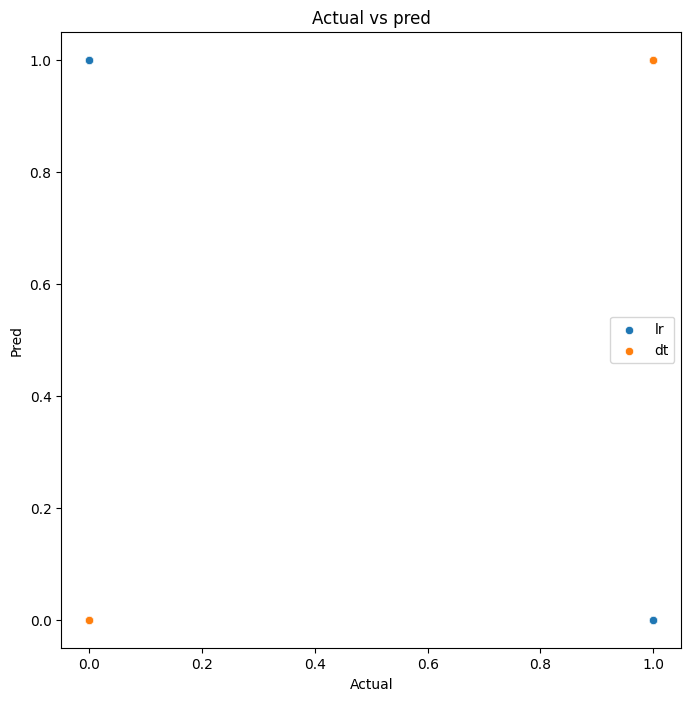

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test , y = y_pred_lr , label = 'lr')
sns.scatterplot(x = y_test , y = y_pred_dt , label = 'dt')
plt.xlabel('Actual')
plt.ylabel('Pred')
plt.title('Actual vs pred')
plt.legend()


In [55]:
from sklearn.model_selection import RandomizedSearchCV
rand_params = {
    'max_depth' : [5, 10, 15, 20, 25],
    'n_estimators' : [100, 200, 300, 400, 500]
}

rand_model = RandomizedSearchCV(rf, rand_params, cv = 5)
rand_model.fit(x_train , y_train)
print('bst par' , rand_model.best_params_)

bst par {'n_estimators': 300, 'max_depth': 20}


In [56]:
y_pred_rand = rand_model.best_estimator_.predict(x_test)

print('Acc sc for rand: ' , accuracy_score(y_test , y_pred_rand))
print(classification_report(y_test , y_pred_rand))
print('cm for rand: ' , confusion_matrix(y_test , y_pred_rand))

Acc sc for rand:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

cm for rand:  [[ 96   0]
 [  0 104]]


In [57]:
df.columns

Index(['Age', 'BMI', 'Blood Pressure', 'Physical Activity (hours/week)',
       'Family History', 'Smoking Status', 'Diabetes Risk'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1000 non-null   float64
 1   BMI                             1000 non-null   float64
 2   Blood Pressure                  1000 non-null   float64
 3   Physical Activity (hours/week)  1000 non-null   float64
 4   Family History                  1000 non-null   int64  
 5   Smoking Status                  1000 non-null   int64  
 6   Diabetes Risk                   1000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


In [59]:
df.nunique()

Age                               51
BMI                               81
Blood Pressure                    58
Physical Activity (hours/week)    15
Family History                     2
Smoking Status                     2
Diabetes Risk                      2
dtype: int64

In [61]:
import gradio as gr 

def diab_pred(age, bmi, bp, pa, fh, ss):
    try:
        input_data = pd.DataFrame({
            'Age' : [age],
            'BMI' : [bmi],
            'Blood Pressure' : [bp],
            'Physical Activity (hours/week)' : [pa],
            'Family History' : [fh],
            'Smoking Status' : [ss]
        })
        
        for col in le_cols:
            input_data[col] = le[col].transform(input_data[col])
            
        input_data[sc_cols] = sc.transform(input_data[sc_cols])    
        
        prediction = rf.predict(input_data)
        
        if prediction == 0:
            return 'No'
        else:
            return 'Yes'
        
    except Exception as e:
        return f'Error {e}'
    
gr.Interface(
    fn = diab_pred,
    inputs= [
        gr.Number(label= 'Age'),
        gr.Number(label= 'BMI'),
        gr.Number(label= 'Blood Pressure'),
        gr.Number(label= 'Physical Activity (hours/week)'),
        gr.Dropdown(choices= list(df['Family History'].unique()) , label= 'Family History'),
        gr.Dropdown(choices= list(df['Smoking Status'].unique()) , label= 'Smoking Status')
        
    ],
    
    outputs= gr.Textbox(label= 'Risk to diabetes'),
    title = 'diab pred'
).launch()    

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
